In [1]:
#pip install matplotlib #Instalar modulos en caso de ser necesario
#pip install sklearn
#pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree #Este es para arbol de decision
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
test_df = pd.read_csv('./db/titanic-test.csv')
train_df = pd.read_csv('./db/titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.Sex.value_counts() #Se realiza un conteo por cada categoría

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribución de viajeros')

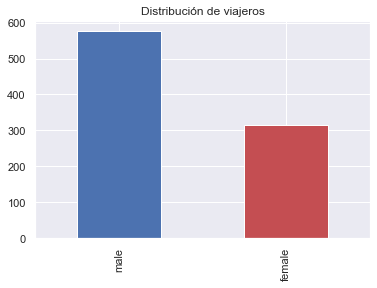

In [5]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribución de viajeros')

In [6]:
men=train_df.loc[train_df['Sex']=='male']
women=train_df.loc[train_df['Sex']=='female']

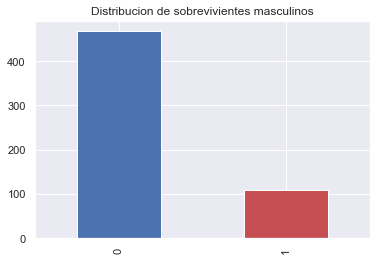

In [7]:
men.Survived.value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes masculinos')
plt.show()

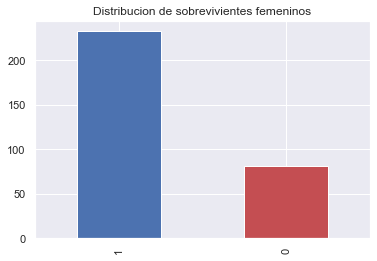

In [8]:
women.Survived.value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes femeninos')
plt.show()

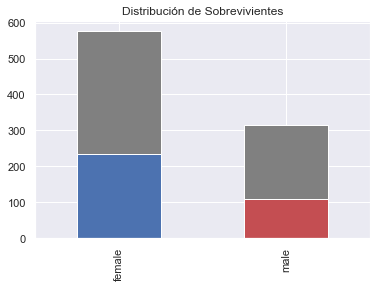

In [9]:
train_df.Sex.value_counts().plot(kind='bar', color=['grey', 'grey'])
train_df[train_df.Survived == 1].Sex.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribución de Sobrevivientes')
plt.show()

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Buscar la manera de tratar con datos nulos
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [14]:
#Se recolectan los nombres de las columnas de tipo object y unicos menores a 10
#Lo de "unicos" se refiere en que los datos de la columna no sean mas de 10 datos distintos
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1) #Re colecta las columnas excepto las marcadas en la lista
categorical_cols = [cname for cname in train_predictors.columns if
                        train_predictors[cname].nunique() < 10 and
                        train_predictors[cname].dtype == 'object'
                    ]
categorical_cols

['Sex', 'Embarked']

In [15]:
train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [16]:
#Se recolectan los nombres de las columnas de tipo int y float
numerical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].dtype in ['int64', 'float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:

my_cols = categorical_cols + numerical_cols #Agrupacion de los conmbres de columnas en una nueva lista
train_predictors = train_predictors[my_cols] #Se obtienen solo ciertas columnas usando la lista anterior
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,28.0,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


In [18]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors) #Codifica las celdas que son texto haciendolo por categorías
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [19]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
y_target = train_df['Survived'].values #variable predictora
x_features_one = dummy_encoded_train_predictors.values

In [21]:
X_train, X_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size=0.25, random_state=1)

In [22]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(X_train, y_train) #Entrenamiento
tree_one

DecisionTreeClassifier()

In [23]:
tree_one_accuracy = round(tree_one.score(X_validation, y_validation), 4)
print('Accuracy: %0.4f' %tree_one_accuracy) #Muestra una buena probabilidad de que tan cercano esta en asignar una buena etiqueta para predecir

Accuracy: 0.7309


In [24]:
from io import StringIO
from IPython.display import Image, display
import pydotplus #Instalar desde la terminal, pip install pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png') #Se genera una imagen con el arbol de desicion


True